In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.datasets import load_iris

In [2]:
iris = load_iris()
df = pd.DataFrame(data = iris.data, columns = iris.feature_names)
data = df.head(6)
data

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
5,5.4,3.9,1.7,0.4


In [3]:
def single_linkage(data):
    n = data.shape[0]
    mat = np.zeros((n, n))
    for i in range(n):
        for j in range(i+1, n):
            mat[i,j] = np.min(np.linalg.norm(data.iloc[i]-data.iloc[j]))
            mat[j,i] = mat[i,j]
    return mat

def complete_linkage(data):
    n = data.shape[0]
    mat = np.zeros((n, n))
    for i in range(n):
        for j in range(i+1, n):
            mat[i,j] = np.max(np.linalg.norm(data.iloc[i]-data.iloc[j]))
            mat[j,i] = mat[i,j]
    return mat

In [4]:
s=single_linkage(data)
print(s)
print()
c=complete_linkage(data)
print(c)

[[0.         0.53851648 0.50990195 0.64807407 0.14142136 0.6164414 ]
 [0.53851648 0.         0.3        0.33166248 0.60827625 1.09087121]
 [0.50990195 0.3        0.         0.24494897 0.50990195 1.08627805]
 [0.64807407 0.33166248 0.24494897 0.         0.64807407 1.16619038]
 [0.14142136 0.60827625 0.50990195 0.64807407 0.         0.6164414 ]
 [0.6164414  1.09087121 1.08627805 1.16619038 0.6164414  0.        ]]

[[0.         0.53851648 0.50990195 0.64807407 0.14142136 0.6164414 ]
 [0.53851648 0.         0.3        0.33166248 0.60827625 1.09087121]
 [0.50990195 0.3        0.         0.24494897 0.50990195 1.08627805]
 [0.64807407 0.33166248 0.24494897 0.         0.64807407 1.16619038]
 [0.14142136 0.60827625 0.50990195 0.64807407 0.         0.6164414 ]
 [0.6164414  1.09087121 1.08627805 1.16619038 0.6164414  0.        ]]


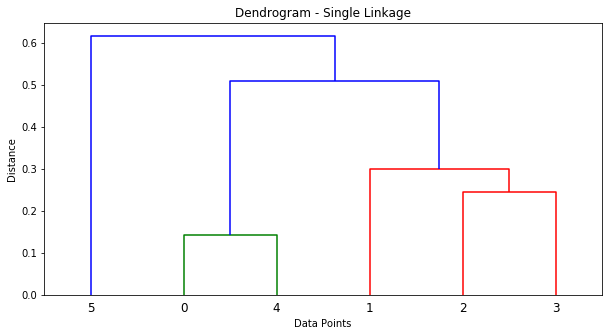

In [5]:
single=linkage(data,method="single")
plt.figure(figsize=(10, 5))
dendrogram(single)
plt.title('Dendrogram - Single Linkage')
plt.xlabel('Data Points')
plt.ylabel('Distance')
plt.show()

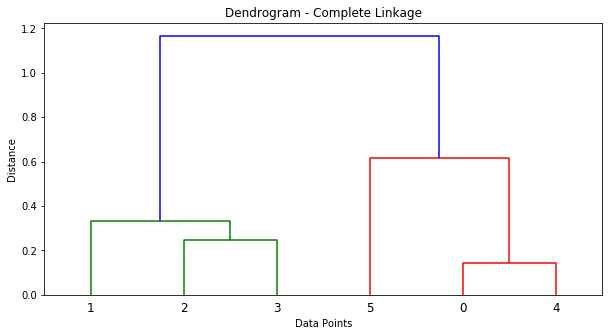

In [6]:
com=linkage(data,method="complete")
plt.figure(figsize=(10, 5))
dendrogram(com)
plt.title('Dendrogram - Complete Linkage')
plt.xlabel('Data Points')
plt.ylabel('Distance')
plt.show()